# Övningsprov

## Uppgift 1

[Text(0.5, 1.0, 'Plot'), Text(0.5, 0, 'x'), Text(0, 0.5, 'y')]

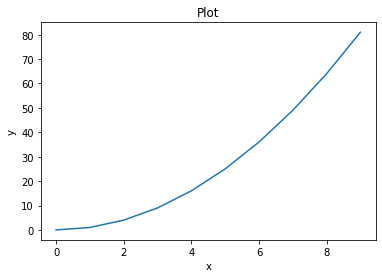

In [31]:
import matplotlib.pyplot as plt  #Import the package matplotlib.pyplot, which is used for plotting. Import it as plt, so that we do not have to use the full name when we write the code.

x = list(range(10)) #Creates a list of 10 numbers, between 0 and 9, and stores them in variable x.
y = [i**2 for i in x] #For each number in the list x, raise the number to the power of 2 and store it in a list y.
fig, ax = plt.figure(), plt.axes() #plt.figure() creates the figure/background for plotting the values (it is the top level container for all the plot elements). plt.axes() creates the axes for the figure. We can later use ax.plot(), instead of plt.plot(). This is the OOP approach to matplotlib.
ax.plot(x,y) #Creates the plot and plots the x values on the x-axis and the y-values on the y-axis. x will have the values 0-9 and y will have the squared values of x: 0, 1, 4, 9, 16, 25, 36, 49, 64, 81. The values will be connected with a line.
ax.set(title="Plot", xlabel="x", ylabel="y") #Sets the title to “Plot” and the xlabel and ylabel to “x” and “y” respectively. The title will be shown on the top of the plot and the y-value to the left of the y-axis and the x-label below the x-axis.

## Uppgift 2

In [32]:
#Version 1

import random as rnd
dice_rolls_counted = {"ones":0, "twos":0, "threes":0, "fours":0, "fives":0, "sixes":0}

for roll in range(1000000):
	result = rnd.randint(1, 6)

	if result == 1:
		dice_rolls_counted["ones"] += 1
	if result == 2:
		dice_rolls_counted["twos"] += 1
	if result == 3:
		dice_rolls_counted["threes"] += 1
	if result == 4:
		dice_rolls_counted["fours"] += 1
	if result == 5:
		dice_rolls_counted["fives"] += 1
	if result == 6:
		dice_rolls_counted["sixes"] += 1

print(dice_rolls_counted)

{'ones': 167100, 'twos': 166505, 'threes': 166444, 'fours': 166485, 'fives': 166856, 'sixes': 166610}


In [33]:
#Version 2

import random as rnd
dice_rolls_counted = {"1":0, "2":0, "3":0, "4":0, "5":0, "6":0}

for roll in range(1000000):
    result = rnd.randint(1, 6)
    dice_rolls_counted[str(result)] += 1

print(dice_rolls_counted)

{'1': 166816, '2': 166731, '3': 166444, '4': 166533, '5': 166771, '6': 166705}


## Uppgift 3

In [34]:
import math

def volume_sphere(radius:float) -> float:
	"""
	Calculates the volume of a sphere.

	Parameters
	----------
	radius:float
		The radius of a sphere.

	Raises
	------
	TypeError
		If the value for the radius is not an int or a float.
	ValueError
		If the radius is 0 or below

	Returns
	-------
	The volume of the sphere.
	"""

	if not isinstance(radius, (int, float)):
		raise TypeError(f"The value has to be an int or a float, not {type(radius)}.")
	if radius <= 0 :
		raise ValueError("The value has to be above 0.")
	return (4*math.pi*(radius**3))/3

try: 
	radius = input("Please enter the radius of the sphere.")

	if not radius.strip("-").isnumeric(): #If we do not use strip "-", negative values will not be recognised as numerical.
		raise TypeError("The value has to be numerical.")

	radius = float(radius)

	if radius <= 0 :
			raise ValueError("The value has to be above 0.")

	print(f"The volume of the sphere is: {volume_sphere(radius):.1f}.")

except (ValueError, TypeError) as err: #Both ValueError and TypeError has to be part of the except. Otherwise the program crashes.
	print(err)

The volume of the sphere is: 113.1.


## Uppgift 4

In [35]:
with open ("bamba.txt", "r") as b:
    bamba = b.read()

print(bamba)

v42
Chili sin carne
Pannkakor
Ärtsoppa
Kebab
Vegetarisk lasagne


## Uppgift 5

In [36]:
#OLD VERSION

from math import sqrt

path = "testpoints/testpunkter.txt"
with open (path, "r") as t:
    test = [line.strip("\n") for line in t.readlines()] #Reads each line, strips it from "\n" and saves each line in the list test.
    test.pop(0) #Removes the heading
    test = [line.replace("(", "").replace(")", "") for line in test] #Removes all paranthesis for each item
    test = [line.split(", ") for line in test] #Split the elements on comma, empty space, so that we create inner lists, consisting of two points
    test = [[line[0].split(","), line[1].split(",")] for line in test] #Splits the items in the inner lists into two lists, where each list contains an x and y value 
    test = [[(int(line[0][0]), int(line[0][1])), (int(line[1][0]), int(line[1][1]))] for line in test] #Changes the x and y values in the inner-inner lists and stores them as tuples (x, y)
    print(test)

def eucl_dist(point1:tuple, point2:tuple) -> float:
    """
    Calculates the euclidean distance between two points.

    Parameters
        ---------------
    point1 : tuple
    The first point (x, y) for comparison.
    point2 : tuple
    The second point (x, y) for comparison.

    Returns
    -----------
    The euclidean distance between point 1 and 2.
    """
    
    return sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

for point in test:
    print(f"The euclidean distance between {point[0]}, {point[1]} is: {eucl_dist(point[0], point[1]):.1f}.")

[[(1, 2), (0, 0)], [(2, 0), (3, 5)], [(-2, -2), (9, 2)]]
The euclidean distance between (1, 2), (0, 0) is: 2.2.
The euclidean distance between (2, 0), (3, 5) is: 5.1.
The euclidean distance between (-2, -2), (9, 2) is: 11.7.


In [50]:
#NEW VERSION
with open ("testpoints/testpunkter.txt", "r") as f1:
    test = [line.strip("\n") for line in f1.readlines()[1:]]
    test = [line.split(", ") for line in test]
    test = [[eval(line[0]), eval(line[1])] for line in test]

def eucl_dist(point1:tuple, point2:tuple) -> float:
    """
    Calculates the euclidean distance between two points.

    Parameters
    -----------
    point1 : tuple
        The first point (x, y) for comparison.
    point2 : tuple
        The second point (x, y) for comparison.

    Returns
    -------
    The euclidean distance between point 1 and 2.
    """
    
    return sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

for point in test:
    print(f"The euclidean distance between {point[0]}, {point[1]} is: {eucl_dist(point[0], point[1]):.1f}.")

The euclidean distance between (1, 2), (0, 0) is: 2.2.
The euclidean distance between (2, 0), (3, 5) is: 5.1.
The euclidean distance between (-2, -2), (9, 2) is: 11.7.


In [48]:
#EXPLANATION

path = "testpoints/testpunkter.txt"
with open (path, "r") as t:
    #Reads each line, strips it from "\n" and saves each line in the list test (four elements in a list)
    test = [line.strip("\n") for line in t.readlines()]
    #Results in: ['Punkt 1, punkt 2', '(1,2), (0,0)', '(2,0), (3,5)', '(-2,-2), (9,2)']
    
    #Removes the heading (three elements in a list)
    test.pop(0) 
    #Results in: ['(1,2), (0,0)', '(2,0), (3,5)', '(-2,-2), (9,2)']

    #Removes all paranthesis for each item (three elements in a list)
    test = [line.replace("(", "").replace(")", "") for line in test] 
    #Results in: ['1,2, 0,0', '2,0, 3,5', '-2,-2, 9,2']

    #Splits each of the three elements on comma (e.g. '1,2, 0,0' will result in '1,2', '0,0')
    #Since '1,2, 0,0' is an element, this will also result in that it will become an inner list, with two elements
    test = [line.split(", ") for line in test]
    #Results in: [['1,2', '0,0'], ['2,0', '3,5'], ['-2,-2', '9,2']]
    
    #Splits each element in the inner lists on comma (e.g. '1,2' will result in '1', '2')
    #Since '1,2' is an element, this will also result in that it will become an inner list, with two elements
    test = [[line[0].split(","), line[1].split(",")] for line in test] 
    #Results in: [[['1', '2'], ['0', '0']], [['2', '0'], ['3', '5']], [['-2', '-2'], ['9', '2']]]
    
    #Changes the x and y values in the inner-inner lists and stores them as tuples (x, y)
    #line is [['1', '2'], ['0', '0']]
    #line[0] is ['1', '2']
    #line[0][0] is '1'
    test = [[(int(line[0][0]), int(line[0][1])), (int(line[1][0]), int(line[1][1]))] for line in test] 
    #Results in: [[(1, 2), (0, 0)], [(2, 0), (3, 5)], [(-2, -2), (9, 2)]]
    print(test)

[[(1, 2), (0, 0)], [(2, 0), (3, 5)], [(-2, -2), (9, 2)]]


## Uppgift 6

In [37]:
import random as rnd #Imports the random package as rnd

def draw(total_cards:list, picked_cards:list, is_player:bool=True, show_card:bool=True) -> list:	
	
	card_number = rnd.randint(2, 14) #Generates a random integer between 2 and 14

	#If the card number is no longer available in the deck, generate a new random number.
	while total_cards[card_number-2][1] == 0: 
		card_number = rnd.randint(2, 14)

	deck[card_number-2][1] -= 1 #Removes one from the count of the card number

	#Player or dealer
	if is_player == True:
		player = "You"
	else:
		player = "The dealer"

	#List of card names
	card_names = {11:"Jack", 12:"Queen", 13:"King", 14:"Ace"}

	#Adds to the picked_cards and gives feedback
	if card_number == 11 or card_number == 12 or card_number == 13 or card_number == 14:
		picked_cards[card_number-2][1] += 1
		if show_card == True:
			print(f"{player} got a {card_names[card_number]}!")
	else:
		picked_cards[card_number-2][1] += 1
		if show_card == True:
			print(f"{player} got a {card_number}!")
	
	return total_cards, picked_cards

In [38]:
#COUNT CARDS

def count_cards(picked_cards:list) -> int:
	card_count = 0
	for card_number in picked_cards:
		if card_number[0] == 11 or card_number[0] == 12 or card_number[0] == 13:
			card_count += (card_number[1] * 10)
		elif card_number[0] == 14: 
			if (card_count + card_number[1] * 11) <= 21:
				card_count += (card_number[1] * 11)
			else:
				card_count += (card_number[1]*1)
		else:
			card_count += (card_number[0] * card_number[1])
	return card_count

In [39]:
#INITIALIZES VALUES

#Creates a list of lists, where the first number in the list symbolises the card number (between 2 and 14, where 11=Jack, 12=Queen, 13=King and 14=Ace) and the second number symbolises the count of the card (initialised to 4). This is the full deck.
deck = [[card_number, 4] for card_number in range(2, 15)]

#Creates a list of lists to store the player’s cards (the second element in the inner lists is the number of cards of that type that the player has picked).
players_cards = [[card_number, 0] for card_number in range(2, 15)]

#Sets the count of the card values for the dealer
dealers_cards = [[card_number, 0] for card_number in range(2, 15)]

#DEALER DRAWS TWO CARDS

deck, dealers_cards = draw(deck, dealers_cards, is_player=False, show_card=True)
deck, dealers_cards = draw(deck, dealers_cards, is_player=False, show_card=False)

#PLAYER DRAWS TWO CARDS

for _ in range(2):
	deck, players_cards = draw(deck, players_cards, is_player=True, show_card=True)

#PLAYER CONTINUES TO DRAW CARDS

while(True):
    to_continue = input("Type 'yes' if you want to draw another card. To finish and count your cards, type 'no'.")
    to_continue = to_continue.lower()
    if to_continue != "yes" and to_continue != "no":
        print("You are only allowed to enter 'yes' or 'no'. Please try again.")
    elif to_continue == "yes":
        deck, players_cards = draw(deck, players_cards, is_player=True, show_card=True)
    else: 
        break

#COUNT RESULTS

players_result = count_cards(players_cards)
dealers_result = count_cards(dealers_cards)

if (players_result <= 21 and players_result > dealers_result) or dealers_result  > 21:
	print(f"Congratulations! You won! You got {players_result} and the dealer got {dealers_result}.")
else:
	print(f"You lost! You got {players_result} and the dealer got {dealers_result}.")

The dealer got a 9!
You got a 4!
You got a King!
You got a 5!
Congratulations! You won! You got 19 and the dealer got 16.


In [27]:
print(deck)
print(dealers_cards)
print(players_cards)
print(dealers_result)
print(players_result)

[[2, 3], [3, 3], [4, 4], [5, 3], [6, 4], [7, 4], [8, 4], [9, 3], [10, 3], [11, 4], [12, 4], [13, 3], [14, 4]]
[[2, 0], [3, 0], [4, 0], [5, 1], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 1], [14, 0]]
[[2, 1], [3, 1], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 1], [10, 1], [11, 0], [12, 0], [13, 0], [14, 0]]
15
24


## Uppgift 7

In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np

class NormalDist:
    def __init__(self, mu:float, sigma:float) -> None:
        self.mu = mu
        self.sigma = sigma
        
    @property
    def mu(self):
        return self._mu
    
    @property
    def sigma(self):
        return self._sigma
    
    @mu.setter
    def mu(self, mu):
	    self._mu = NormalDist.is_numerical(mu)
    
    @sigma.setter
    def sigma(self, sigma):
        self._sigma = NormalDist.is_numerical(sigma)
    
    @staticmethod
    def is_numerical(value):
        if not isinstance(value, (int, float)):
            raise ValueError("The value has to be numerical.")
        return value
        
    def pdf(self, x:float) -> float:
        NormalDist.is_numerical(x)
        formula_part1 = 1/(self.sigma*(math.sqrt(2*math.pi)))
        formula_part2 = math.e**(-1/2*((x-self.mu)/self.sigma)**2)
        return float(formula_part1*formula_part2)

    def plot_pdf(self, x:float) -> None:
        NormalDist.is_numerical(x)
        fig = plt.figure(dpi=100)
        ax = plt.axes()
        
        x_values = np.arange(-self.sigma*3, self.sigma*3, .001) #Creates a list of x_values between -3 SD and 3 SD, with a step of .001
        f_values = [self.pdf(x) for x in x_values] #Run the pdf-function on all the x-values and store them in f_values
        ax.plot(x_values, f_values) #Plots the values
        ax.scatter(x, self.pdf(x)) #Plots the x-point.
        ax.set(title="Normal Distribution", xlabel="x", ylabel="f(x)")
        plt.show()
		
    def __add__(self, other) -> "NormalDist":
        normal_dist_added = NormalDist((self.mu+other.mu), (self.sigma+other.sigma))
        return normal_dist_added
    
    def __repr__(self):
        return f"A normal distribution with mu={self.mu}, sigma={self.sigma}."

A normal distribution with mu=-2, sigma=8.
0.041020121068796885


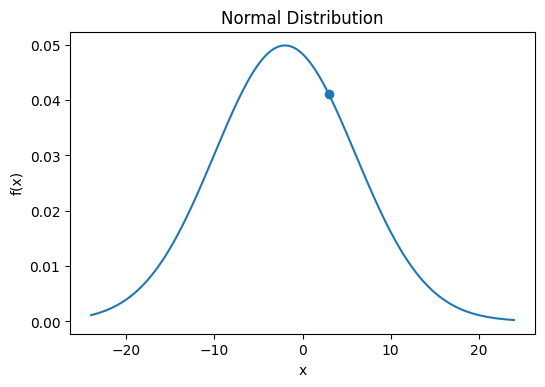

In [7]:
n_dist1 = NormalDist(0, 3)
n_dist2 = NormalDist(-2, 5)

n_dist3 = n_dist1 + n_dist2
print(n_dist3)
print(n_dist3.pdf(3))
n_dist3.plot_pdf(3)